In [71]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import pathlib

import scipy.stats as ss
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
#from mlxtend.plotting import plot_learning_curves
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

In [72]:
def filter_data(iso2,number):
    df = pd.read_csv(iso2+'_'+str(number)+'.csv')
    df1 = df[df['B7.1']==1]
    df2 = df1[df1['B8.NA']==0]
    df3 = df2[df2['B8.3']==0]
    
    df3 = df3.assign(Cli=0)
    df3 = df3.assign(Cli_who=0)

    lista_valor_cli_DE =[]
    for i in range(len(df3.index)):
        if (df3['B1_1.1'][df3.index[i]] ==1 and (df3['B1_2.1'][df3.index[i]] ==1 or df3['B1_3.1'][df3.index[i]]==1)):
            lista_valor_cli_DE.append(1)
        else:
            lista_valor_cli_DE.append(0)


    df3['Cli']=lista_valor_cli_DE


    lista_valor_cli_who_DE =[]
    for i in range(len(df3.index)):
        if (df3['B1_1.1'][df3.index[i]] ==1 and df3['B1_2.1'][df3.index[i]] ==1 and df3['B1_4.1'][df3.index[i]]==1):
            lista_valor_cli_who_DE.append(1)
        else:
            lista_valor_cli_who_DE.append(0)
    df3['Cli_who']=lista_valor_cli_who_DE
    
    return df3 

In [73]:
def data_cross_validation(iso2,list_join):
    df_cv = pd.concat([filter_data(iso2,list_join[0]), filter_data(iso2,list_join[1])], axis=0)
    df_cv = pd.concat([df_cv, filter_data(iso2,list_join[2])], axis=0)
    df_cv = pd.concat([df_cv, filter_data(iso2,list_join[3])], axis=0)
    
    return df_cv

In [74]:
def preprocessing_cv(iso2,list_join):
    df = data_cross_validation(iso2,list_join)
    
    X_train = df.drop(['Unnamed: 0','B2','B4','E5','B8.1','B8.2','B8.3','B8.NA','B7.1','B7.2','B7.NA','weight', 'Finished', 'RecordedDate','ISO_3', 'country_agg', 'region_agg','date_from_file', 'date', 'ISO2', 'age','B1_1.NA','B1_2.NA','B1_3.NA','B1_4.NA','B1_5.NA','B1_6.NA','B1_7.NA','B1_8.NA','B1_9.NA','B1_10.NA','B1_11.NA','B1_12.NA','B3.NA','B5.NA','B6.NA','B7.NA','B8.NA','B7.1','B7.2','B8.1','B8.2','B8.3','C0_1.NA','C0_2.NA','C0_3.NA','C0_4.NA','C0_5.NA','C0_6.NA','C1_m.NA','C2.NA','C3.NA','C5.NA','C6.NA','D1.NA','D2.NA','D3.NA','D4.NA','E3.NA','E4.NA','E2.NA','D1.-88', 'D2.-88', 'D4.-88','Cli','Cli_who'], axis=1)
    Y_train = df['B8.1']
    
    return X_train, Y_train

In [75]:
def preprocessing(iso2,number):
    df = filter_data(iso2,number)
    
    X_test = df.drop(['Unnamed: 0','B2','B4','E5','B8.1','B8.2','B8.3','B8.NA','B7.1','B7.2','B7.NA','weight', 'Finished', 'RecordedDate','ISO_3', 'country_agg', 'region_agg','date_from_file', 'date', 'ISO2', 'age','B1_1.NA','B1_2.NA','B1_3.NA','B1_4.NA','B1_5.NA','B1_6.NA','B1_7.NA','B1_8.NA','B1_9.NA','B1_10.NA','B1_11.NA','B1_12.NA','B3.NA','B5.NA','B6.NA','B7.NA','B8.NA','B7.1','B7.2','B8.1','B8.2','B8.3','C0_1.NA','C0_2.NA','C0_3.NA','C0_4.NA','C0_5.NA','C0_6.NA','C1_m.NA','C2.NA','C3.NA','C5.NA','C6.NA','D1.NA','D2.NA','D3.NA','D4.NA','E3.NA','E4.NA','E2.NA','D1.-88', 'D2.-88', 'D4.-88','Cli','Cli_who'], axis=1)
    Y_test = df['B8.1']
    
    return X_test, Y_test

In [76]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [77]:
def decision_tree(iso2,list_join,number):
    
    max_depth = np.arange(1, 10)
    min_samples_leaf = [50,100,200]
    param_grid = { 'criterion':['gini','entropy'],'max_depth': max_depth,'min_samples_leaf': min_samples_leaf}

    dtree_model=tree.DecisionTreeClassifier()
    dtree_model = GridSearchCV(dtree_model, param_grid,scoring='f1')
    dtree_model=dtree_model.fit(preprocessing_cv(iso2,list_join)[0], preprocessing_cv(iso2,list_join)[1])
    
    my_model = dtree_model.best_estimator_
    my_tree=my_model.fit(preprocessing_cv(iso2,list_join)[0], preprocessing_cv(iso2,list_join)[1])

    y_pred = my_model.predict(preprocessing(iso2,number)[0])
    
    y_test = preprocessing(iso2,number)[1]

    print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
    print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
    print(f'Recall score: {recall_score(y_test,y_pred)}')
    print("")
    matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    print('Specificity:', tn/(tn+fp))
    print(f'F1 score: {f1_score(y_test,y_pred)}')
    print(f'Precision score: {precision_score(y_test,y_pred)}')
    print(matrix)
    print("")
    print(classification_report(y_test, y_pred))
    plt.figure(figsize=(7,7))
    sns.heatmap(matrix,annot=True, square = True, fmt='g')
    plt.show()
    
    plot_precision_recall_curve(my_model, preprocessing(iso2,number)[0], y_test)

Accuracy Score: 0.9773406456274014
Area Under Curve: 0.7093942448844608
Recall score: 0.4233160621761658

Specificity: 0.9954724275927559
F1 score: 0.542136695421367
Precision score: 0.753690036900369
[[58705   267]
 [ 1113   817]]

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     58972
           1       0.75      0.42      0.54      1930

    accuracy                           0.98     60902
   macro avg       0.87      0.71      0.77     60902
weighted avg       0.97      0.98      0.97     60902



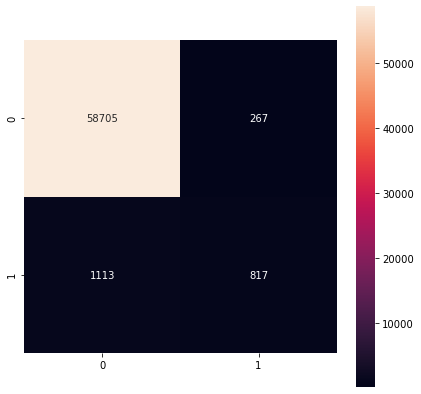

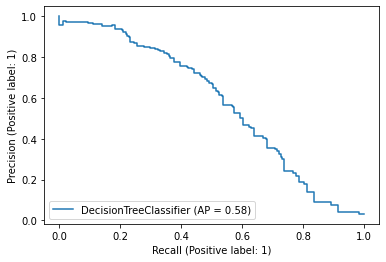

In [78]:
decision_tree('DE',[1,2,3,4],5)

In [79]:
def logistic_regression(iso2,list_join,number):
    w = {0:3, 1:97}
    # define model
    lg = LogisticRegression(random_state=2, class_weight=w)
    # fit it
    lg.fit(preprocessing_cv(iso2,list_join)[0], preprocessing_cv(iso2,list_join)[1])
    y_pred = lg.predict(preprocessing(iso2,number)[0])
    
    y_test = preprocessing(iso2,number)[1]
    
    print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
    print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
    print(f'Recall score: {recall_score(y_test,y_pred)}')
    print("")
    matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    print('Specificity:', tn/(tn+fp))
    print(f'F1 score: {f1_score(y_test,y_pred)}')
    print(f'Precision score: {precision_score(y_test,y_pred)}')
    print(matrix)
    print("")
    print(classification_report(y_test, y_pred))
    plt.figure(figsize=(7,7))
    sns.heatmap(matrix,annot=True, square = True, fmt='g')
    plt.show()

    plot_precision_recall_curve(lg, preprocessing(iso2,number)[0], y_test)

Accuracy Score: 0.8986240189156349
Area Under Curve: 0.8529305731814765
Recall score: 0.8041450777202073

Specificity: 0.9017160686427457
F1 score: 0.3345548609614141
Precision score: 0.21121393576483397
[[53176  5796]
 [  378  1552]]

              precision    recall  f1-score   support

           0       0.99      0.90      0.95     58972
           1       0.21      0.80      0.33      1930

    accuracy                           0.90     60902
   macro avg       0.60      0.85      0.64     60902
weighted avg       0.97      0.90      0.93     60902



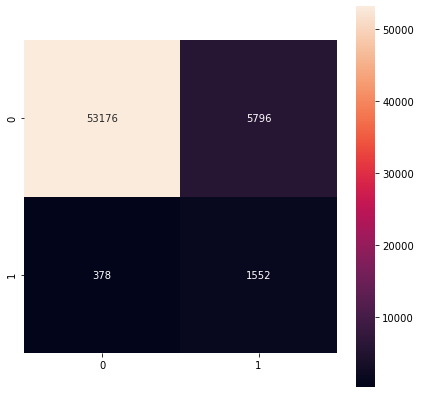

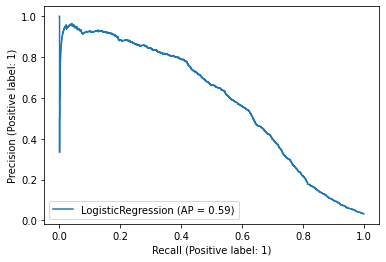

In [80]:
logistic_regression('DE', [1,2,3,4],5)

In [81]:
def cli(iso2,number):
    
    df = filter_data(iso2,number)
    
    X = df['Cli']
    Y = df['B8.1']

    X=X.values.reshape(-1,1)

    print(f'Accuracy Score: {accuracy_score(Y,X)}')
    print(f'Area Under Curve: {roc_auc_score(Y, X)}')
    print(f'Recall score: {recall_score(Y,X)}')
    print("")
    matrix = confusion_matrix(Y, X)
    tn, fp, fn, tp = confusion_matrix(Y, X).ravel()
    print('Specificity:', tn/(tn+fp))
    print(f'F1 score: {f1_score(Y,X)}')
    print(f'Precision score: {precision_score(Y,X)}')
    print(matrix)
    print("")
    print(classification_report(Y, X))
    plt.figure(figsize=(7,7))
    sns.heatmap(matrix,annot=True, square = True, fmt='g')
    plt.show()

Accuracy Score: 0.9673738136678598
Area Under Curve: 0.5754451133215414
Recall score: 0.15699481865284975

Specificity: 0.9938954079902327
F1 score: 0.2337061318935596
Precision score: 0.45701357466063347
[[58612   360]
 [ 1627   303]]

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     58972
           1       0.46      0.16      0.23      1930

    accuracy                           0.97     60902
   macro avg       0.72      0.58      0.61     60902
weighted avg       0.96      0.97      0.96     60902



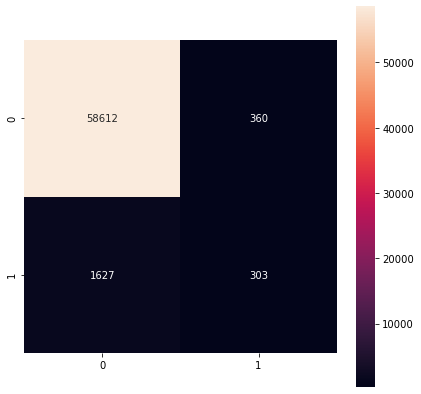

In [82]:
cli('DE',5)

In [83]:
def cli_who(iso2,number):
    
    df = filter_data(iso2,number)
    
    X = df['Cli_who']
    Y = df['B8.1']

    X=X.values.reshape(-1,1)

    print(f'Accuracy Score: {accuracy_score(Y,X)}')
    print(f'Area Under Curve: {roc_auc_score(Y, X)}')
    print(f'Recall score: {recall_score(Y,X)}')
    print("")
    matrix = confusion_matrix(Y, X)
    tn, fp, fn, tp = confusion_matrix(Y, X).ravel()
    print('Specificity:', tn/(tn+fp))
    print(f'F1 score: {f1_score(Y,X)}')
    print(f'Precision score: {precision_score(Y,X)}')
    print(matrix)
    print("")
    print(classification_report(Y, X))
    plt.figure(figsize=(7,7))
    sns.heatmap(matrix,annot=True, square = True, fmt='g')
    plt.show()

Accuracy Score: 0.9683425831663984
Area Under Curve: 0.5664229779373648
Recall score: 0.13730569948186527

Specificity: 0.9955402563928644
F1 score: 0.21562245728234333
Precision score: 0.5018939393939394
[[58709   263]
 [ 1665   265]]

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     58972
           1       0.50      0.14      0.22      1930

    accuracy                           0.97     60902
   macro avg       0.74      0.57      0.60     60902
weighted avg       0.96      0.97      0.96     60902



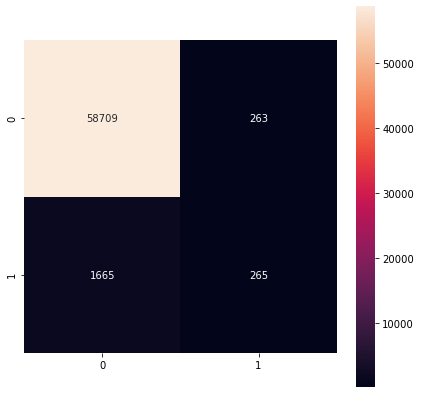

In [84]:
cli_who('DE',5)